In [1]:
import numpy as np
import pandas as pd
from os.path import join, dirname, isfile, basename
from os import getcwd, listdir
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
if 'jupyterthemes' in sys.modules:
    from jupyterthemes import jtplot
    jtplot.style()

In [3]:
# Create fake data with all of the expected oil reserves in the map
# Mark every 100 feet
x = np.arange(start=0, stop=100000, step=1000)
y = np.arange(start=0, stop=100000, step=1000)
l = []
for i in range(len(x)):
    for j in range(len(y)):
        l.append([y[j], x[i]])
locations = np.array(l)
oil = np.random.rand(10000)

Text(0.5, 1.0, 'Oil')

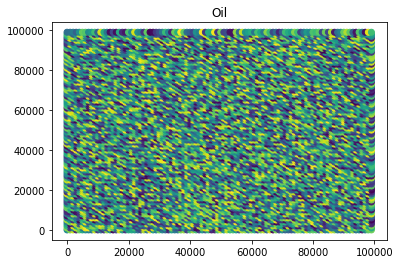

In [4]:
fig, ax = plt.subplots()
ax.scatter(locations[:,0], locations[:,1], c= oil)
ax.set_title("Oil")

In [5]:
well_length = 5280
top_10 = []
for i, location in enumerate(locations):
    x = location[0]
    y = location[1]
    i_initial = i
    output = oil[int(x / 1000 + y / 10)]
    final_x = x + well_length
    while location[0] < final_x and location[1] == y:
        i += 1
        if i >= len(locations): break
        location = locations[i]
        output += oil[int(location[0] / 1000 + y / 10)]
    if len(top_10) < 10:
        top_10.append((x, y, output))
        top_10 = sorted(top_10, key = lambda x: x[2])
    elif max([x[2] for x in top_10]) < output:
        top_10[0] = (x, y, output)
        top_10 = sorted(top_10, key = lambda x: x[2])

In [6]:
print(top_10)

[(0, 0, 4.1733731657814115), (24000, 0, 4.220360250074873), (25000, 0, 4.448792554303967), (48000, 0, 4.516745238861684), (49000, 0, 4.985231765818444), (75000, 0, 5.238751166432041), (3000, 1000, 5.277443267404443), (2000, 2000, 5.795221017429936), (5000, 2000, 5.815196575087481), (50000, 20000, 6.304550052556916)]


In [8]:
lines = [[(x[0], x[1]), (x[0] + well_length, x[1])] for x in top_10]
import matplotlib.collections as mc
lc = mc.LineCollection(lines, colors = "red", linewidths=28)
ax.add_collection(lc)

<BarContainer object of 3 artists>